# Case Study 6 -Data Preprocessing
### Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

### 1. Load the dataset into python environment

In [2]:
data=pd.read_csv("titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make ‘PassengerId’ as the index column

In [3]:
data=pd.read_csv("titanic_dataset.csv",index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


##### Inference:
    1. Data has 891 rows or entries and 11 columns.
    2. Columns Age, Cabin and Embarked has null values 
    3. Data is of 3 data types: float, int and object

### 4. Fill in all the missing values present in all the columns in the dataset

To get the number of missing values in each column, we can use pandas isnull() or notnull() methods. isnull() method returns an boolean value TRUE when null value is present whereas notnull() method returns an boolean value TRUE, if there is no null value for every observation in the data. We will add them so that it gives the no of null or non-null values in both cases.

In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

        Missing values are present in Age, Cabin and Embarked columns. Age is of Numerical Datatype and Cabin, Embarked are of Object Datatype which may be string or a character.

#### 1. Numeric Data: Imputing with Mean/Median/Mode/Backward fill/ Forward fill

> Null values are replaced with mean/median.mode in this method. This is the statistical method of handling Null values. This method yields good results when compared to removing null values.


> The mean of the numerical column data is used to replace null values when the data is normally distributed. Median is used if the data comprised of outliers. Mode is used when the data having more occurences of a particular value or more frequent value.

In [8]:
data['Age'].mean()

29.69911764705882

In [9]:
data['Age'].median()

28.0

In [10]:
data['Age'].mode()

0    24.0
dtype: float64

We have got mean as 29.69, median as 28.0 and mode as 24.0 for Age column. Since Age column has no outliers in it, we are replacing null values with the mean

In [11]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

#####  Checking for null values in Age column

In [12]:
data['Age'].isnull().sum()

0

#### 2. Categorical Data
Cabin and Embarked columns are of Categorical datatype. 

In [13]:
data[['Cabin','Embarked']].head()

,Cabin,Embarked
PassengerId,,
1,NaN,S
2,C85,C
3,NaN,S
4,C123,S
5,NaN,S


Number of Missing values in both the columns

In [14]:
data[['Cabin','Embarked']].isnull().sum()

Cabin       687
Embarked      2
dtype: int64

    From the above exploration of Cabin and Embarked columns, Embarked column may contain more frequent values in it. Since the values are a type of class. So replacing those null values with most frequent value among them.

Most frequent values in the Embarked column data

In [15]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

From the value_counts(), the most frequent value in the Embarked column is S. So replacing all null values in the Embarked column with most frequent value S (also mode).

In [16]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].value_counts().index[0])

Checking the total number of null values in the Embarked column and also see the value_counts() to check whether they are replaced with S or not.

In [17]:
data['Embarked'].isnull().sum()

0

In [18]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

    We can observe that the number of null values in Embarked column is as 0, and also value_counts() for S had increased by 2. So null values in the Embarked column are replaced by most frequent value ('S').

In [19]:
data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

From the value_counts(), there is no value which can be treate as most frequent value. So replacing all null values in the Cabin column with most frequent value is not possible

Another way of handling null values in the column which is of categorical type, is to add an 'Unknown' class and replace those null values with that class.

In [20]:
data['Cabin'] = data['Cabin'].fillna('Unknown')

Value counts for Cabin Column

In [21]:
data['Cabin'].value_counts()

Unknown        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Checking for null values in Cabin column

In [22]:
data['Cabin'].isnull().sum()

0

Null values in Cabin column are replaced by an Unknown class.

In [23]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

All missing values have been filled

####  Alternative way: Deleting the columns with missing data
     
     If there is a certain columns with missing data, then you can delete the entire column.
     
     axis=1 is used to drop the column with `NaN` values.
     axis=0 is used to drop the row with `NaN` values.
     
         The problem with this method is that we may lose valuable information on that feature, as we have deleted it completely due to some null values.Hence, it should only be used if there are too many null values.

We can set a limit to 70 percent, so that the columns having null values more than or equal to 70 percent are dropped from the dataframe. Viewing columns to see which column in the dataset has been dropped.

In [24]:
limit = len(data) * 0.7
data1=data.dropna(axis=1, thresh=limit)
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Since Cabin column consists of nearly 687 null values out of 891, which is 77.12 percent. So Cabin columns has been dropped.

This method of deleting rows/columns is advised only when there are enough samples in the dataset. Dropping of column having more number of null values is to be done only when column deleted doesn’t effect our analysis or that column is out of scope for our model

In [25]:
data1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### 5. Check and handle outliers in at least 3 columns in the dataset

In [26]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


Outliers can be detected using different visualization methods, we are going to use:
    

##### 1. Boxplot: 
    Boxplot is a visualization tool for identifying outliers, it displays the distribution of statistical observations, its body is classified into four parts; the lowest and the highest(minimum and maximum), the 25 percentile(first quartile(Q1)), the median(50th percentile), the 75th percentile(third quartile(Q3)).Outliers appears above or below the minimum and maximum of the boxplot.

The line of code below plots the boxplot of the ‘Fare’ variable.

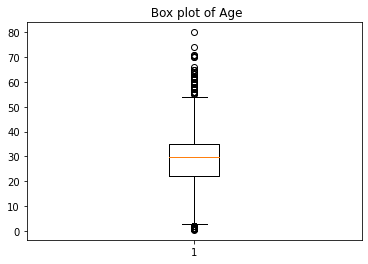

In [27]:
plt.boxplot(data['Age'])
plt.title(' Box plot of Age');

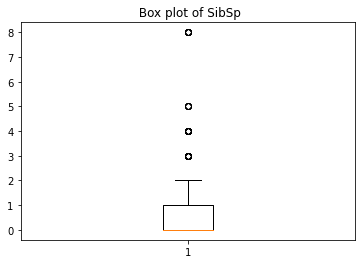

In [28]:
plt.boxplot(data['SibSp'])
plt.title(' Box plot of SibSp');

From the boxplots above, the black circular points show the presence of extreme values in the variable.

###### 2. Histogram
    To visualize the distribution of a numerical variable, a histogram shows the direction in which these variables are distributed, outliers will appear outside the overall distribution of the data. if the histogram is right-skewed or left-skewed, it indicates the presence of extreme values or outliers

The code below plots the histogram of the ‘Age’ variable

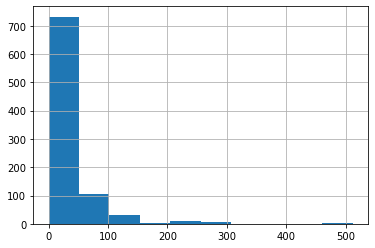

In [29]:
data['Fare'].hist();

        From the histogram above, the histogram appears to be distributed to the left, this also indicates the presence of  outliers.

The skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

In [30]:
print('skewness value of Fare: ',data['Fare'].skew())

skewness value of Fare:  4.787316519674893


From the code above, the ‘Fare’ skewness value of 4.78 shows the variable has been rightly skewed, indicating the presence of outliers

#### Handling of Outliers 

    1. Flooring and Capping.
    2. Trimming.
    3. Replacing outliers with the mean, median, mode, or other values.

##### 1. Flooring and Capping.
    In this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.

The code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Fare’ variable.

In [31]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Fare']=np.where(data['Fare']>upper_whisker,upper_whisker,np.where(data['Fare']<lower_whisker,lower_whisker,data['Fare']))

Using the boxplot to check if there is still the presence of outliers.

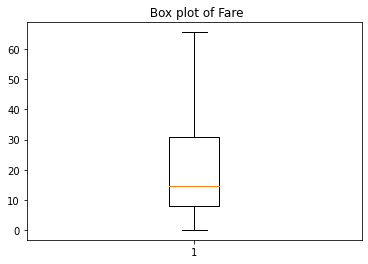

In [32]:
plt.boxplot(data['Fare'])
plt.title(' Box plot of Fare');

The boxplot below shows no presence of outliers

##### 2. Trimming
    In this method, we remove and completely drop all the outliers, the line of code below creates an index for all data points and drop the index values.

In [33]:
Q1 = data['SibSp'].quantile(0.10)
Q3 = data['SibSp'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=data['SibSp'][(data['SibSp']>upper_whisker)|(data['SibSp']<lower_whisker)].index
data.drop(index,inplace=True)

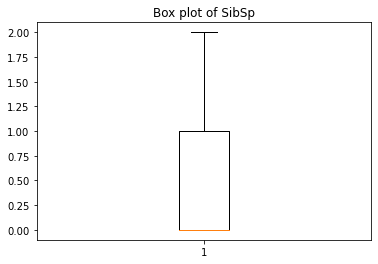

In [34]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp');

The boxplot below shows no presence of outliers

##### 3. Replacing Outliers With The Mean, Median, Mode, or other Values
    In this technique, we replace the extreme values with the mode, median or mean value.   Here mode is used as it is less effected by extreme values

In [35]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
x=data['Age'].mode()
data['Age']=np.where(data['Age']>upper_whisker,x,np.where(data['Age']<lower_whisker,x,data['Age']))

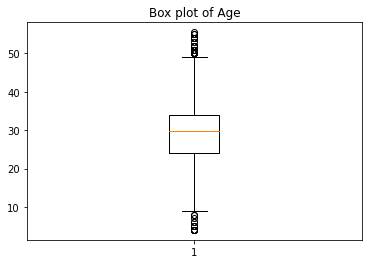

In [36]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age');

When we compare the two boxplots with the one before and after the treatment of the outliers, we still observed that there are a few extreme values that may be newly generated.

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

Min Max Scaling is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data.

In [37]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [38]:
obj_columns = data.select_dtypes(include=['object']).columns
obj_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

Dropping Columns whose data type is Object 

In [39]:
data1=data.drop(obj_columns,axis=1)

In [40]:
x=data1.drop('Survived', axis=1)
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,845.000000,845.000000,845.000000,845.000000,845.000000
mean,2.279290,29.705918,0.313609,0.317160,23.251982
std,0.840396,9.395385,0.530909,0.765829,20.385279
min,1.000000,4.000000,0.000000,0.000000,0.000000
25%,1.000000,24.000000,0.000000,0.000000,7.895800
50%,3.000000,29.699118,0.000000,0.000000,13.000000
75%,3.000000,34.000000,1.000000,0.000000,30.000000
max,3.000000,55.500000,2.000000,6.000000,65.634400


In [41]:
min_max1=preprocessing.MinMaxScaler(feature_range=(0,1))

In [42]:
x1=min_max1.fit_transform(x)
x1=pd.DataFrame(x1)

In [43]:
x1.describe()

,0,1,2,3,4
count,845.000000,845.000000,845.000000,845.000000,845.000000
mean,0.639645,0.499144,0.156805,0.052860,0.354265
std,0.420198,0.182435,0.265454,0.127638,0.310588
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.388350,0.000000,0.000000,0.120300
50%,1.000000,0.499012,0.000000,0.000000,0.198067
75%,1.000000,0.582524,0.500000,0.000000,0.457077
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
min_max2=preprocessing.MinMaxScaler(feature_range=(-1,1))

In [45]:
x2=min_max2.fit_transform(x)
x2=pd.DataFrame(x2)

In [46]:
x2.describe()

,0,1,2,3,4
count,845.000000,845.000000,845.000000,845.000000,845.000000
mean,0.279290,-0.001712,-0.686391,-0.894280,-0.291470
std,0.840396,0.364869,0.530909,0.255276,0.621177
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-0.223301,-1.000000,-1.000000,-0.759401
50%,1.000000,-0.001976,-1.000000,-1.000000,-0.603866
75%,1.000000,0.165049,0.000000,-1.000000,-0.085845
max,1.000000,1.000000,1.000000,1.000000,1.000000
